In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
coca_cola=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')  

In [5]:
coca_cola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [6]:
coca_cola.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [7]:
coca_cola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


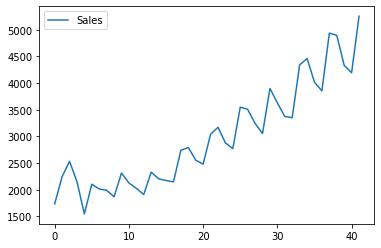

In [8]:
coca_cola.plot()

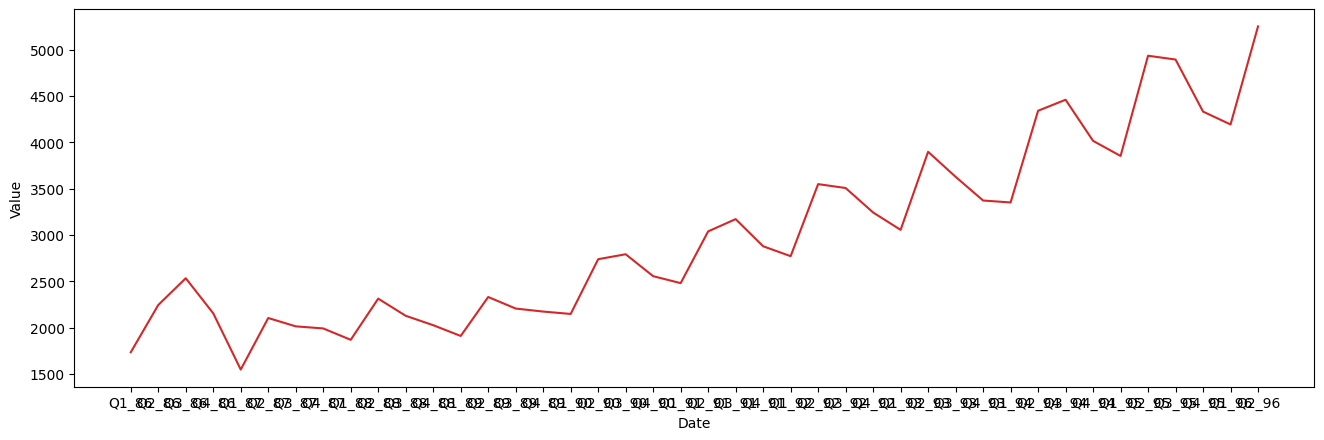

In [9]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(coca_cola, x=coca_cola.	Quarter, y=coca_cola.Sales)#below plot appears like  exponential multiplictive or quadratic multiplicative

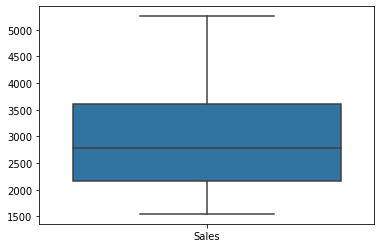

In [10]:
import seaborn as  sns
sns.boxplot(data =coca_cola)

In [11]:
np.array(coca_cola['Sales'])

array([1734.82699966, 2244.96099854, 2533.80499268, 2154.96299744,
       1547.81899643, 2104.41199493, 2014.36299896, 1991.74699783,
       1869.04999924, 2313.63199615, 2128.31999969, 2026.82899857,
       1910.60399628, 2331.16499329, 2206.54999542, 2173.96799469,
       2148.27799988, 2739.30799866, 2792.7539978 , 2556.00999451,
       2480.97399902, 3039.522995  , 3172.11599731, 2879.00099945,
       2772.        , 3550.        , 3508.        , 3243.85999298,
       3056.        , 3899.        , 3629.        , 3373.        ,
       3352.        , 4342.        , 4461.        , 4017.        ,
       3854.        , 4936.        , 4895.        , 4333.        ,
       4194.        , 5253.        ])

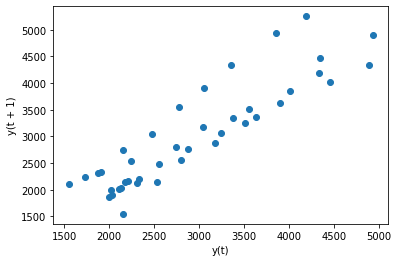

In [13]:
#lagplot
from pandas.plotting import lag_plot
lag_plot(coca_cola['Sales'])

In [14]:
len(coca_cola)

42

In [19]:
coca_cola['quarter'] = 0
for i in range(42):
    p=coca_cola['Quarter'][i]
    coca_cola['quarter'][i]=p[0:2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [20]:
coca_cola

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [21]:
coca_cola['quarter'].value_counts()

Q2    11
Q1    11
Q3    10
Q4    10
Name: quarter, dtype: int64

In [24]:
df_dummies=pd.DataFrame(pd.get_dummies(coca_cola['quarter']),columns=['Q1','Q2','Q3','Q4'])
df=pd.concat([coca_cola,df_dummies],axis= 1)

In [25]:
df

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [36]:
df['t'] = np.arange(1,43)
df['t_squared'] =df['t']**2
df["Sales_log"] =np.log(df['Sales'])

In [38]:
#Spitting data into train and test for error evaluation
split_point = len(df) - 8

In [39]:
train, test = df[0:split_point], df[split_point:]

In [40]:
train

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [41]:
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [42]:
# Linear Model
linear_model =smf.ols("Sales~t",data =train).fit()
linear_pred = pd.Series(linear_model.predict(test['t']))
linear_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(linear_pred)))
linear_rmse

720.6137817965266

In [43]:
#Quadratic Model
quad_model =smf.ols("Sales~t+t_squared",data=train).fit()
quad_pred = pd.Series(quad_model.predict(test[['t','t_squared']]))
quad_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(quad_pred)))
quad_rmse

437.7455637558651

In [44]:
# Exponential model
exp_model  =smf.ols("Sales_log~t",data=train).fit()
exp_pred =pd.Series(exp_model.predict(test['t']))
exp_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(exp_pred)))
exp_rmse

4507.996475118845

In [45]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad"]),"RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_quad,437.745564
0,rmse_linear,720.613782
1,rmse_exp,4507.996475


In [46]:
#using Arima Model
data = pd.read_excel("CocaCola_Sales_Rawdata.xlsx", header=0, index_col=0, parse_dates=True)
data.head()


,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [47]:
#train test split
split_point = len(data) - 7
dataset_cc, validation_cc = data[0:split_point], data[split_point:]
print('Dataset_cc %d, Validation_cc %d' % (len(dataset_cc), len(validation_cc)))


Dataset_cc 35, Validation_cc 7


In [48]:
dataset_cc.to_csv('dataset_cc.csv', header=False)
validation_cc.to_csv('validation_cc.csv', header=False)

In [49]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset_cc.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [50]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=2148.278, Expected=2739.308
>Predicted=2739.308, Expected=2792.754
>Predicted=2792.754, Expected=2556.010
>Predicted=2556.010, Expected=2480.974
>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
>Predicted=3899.000, Expected=3629.000
>Predicted=3629.000, Expected=3373.000
>Predicted=3373.000, Expected=3352.000
>Predicted=3352.000, Expected=4342.000
>Predicted=4342.000, Expected=4461.000
RMSE: 434.401


In [51]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad","RMSE_ARIMA"]),"RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,rmse])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
3,RMSE_ARIMA,434.400665
2,rmse_quad,437.745564
0,rmse_linear,720.613782
1,rmse_exp,4507.996475


In [ ]:
#There are least errors in Arima model so this is best suited for final model building